Importando a biblioteca

In [1]:
import pandas as pd
import numpy as np
import statistics  as sts
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from bcb import currency
from bcb import sgs

from tratar_dados import tratar_dados

Configurando data atual

In [2]:
data_atual = str(datetime.now().strftime("%Y-%m-%d"))

Obtendo série temporal da taxa de câmbio do dolar pela api do bacen

In [3]:
dolar = currency.get(['USD'], start='1994-07-01', end=data_atual, side='both')

Visualizando histórico da taxa de câmbio do Dólar

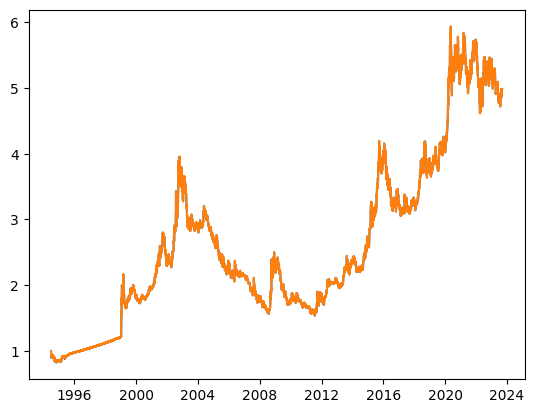

In [4]:
plt.plot(dolar)

Obtendo série temporal do IPCA pela api do bacen

In [5]:
# Definindo datas para período de busca
ipca = sgs.get({'ipca': 433}, start = '1994-07-01', end=data_atual)

Visualizando histórico da taxa de câmbio do Dólar

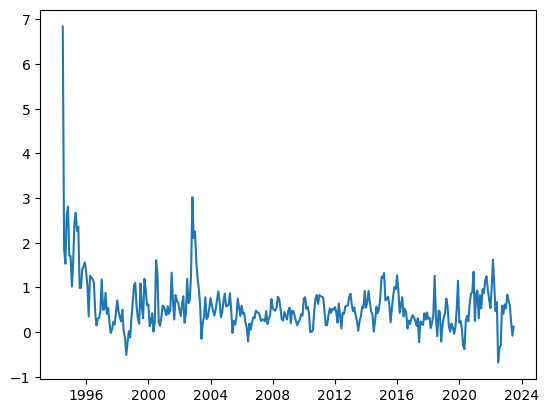

In [6]:
plt.plot(ipca)

Obtendo série temporal do IGP-M pela api do bacen

In [7]:
igpm = sgs.get({'igp-m': 189}, start = '1994-07-01', end=data_atual)

Visualizando histórico da taxa de câmbio do Dólar

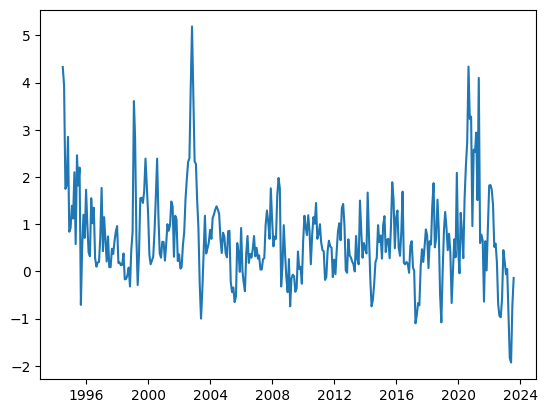

In [8]:
plt.plot(igpm)

Obtendo série temporal da Selic pela api do bacen

In [9]:
selic = sgs.get({'selic':432}, start = '1994-07-01', end=data_atual)

Visualizando histórico da taxa de câmbio do Dólar

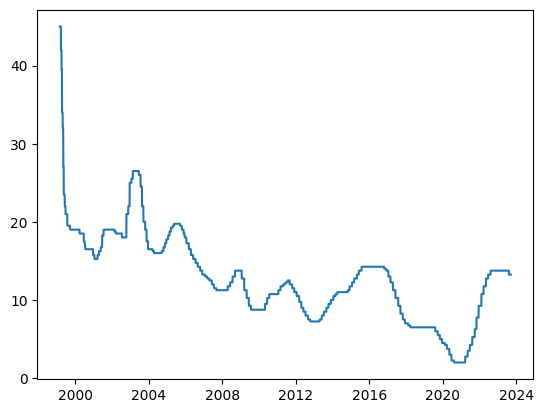

In [10]:
plt.plot(selic)